# kNN - Simple Examples

The model uses classification using kNN on fruit dataset with labels available on features like mass, width, height, color_score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Reading and crafting a dataframe from Excel file 'fruitsKNN.xlsx' residing in the root

In [8]:
fruit = pd.read_excel('fruitsKNN.xlsx')

In [9]:
fruit.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


Creating a DICT by the name 'predict' so that the keys: encoded label and values: name of the fruit

In [10]:
predict = dict(zip(fruit['fruit_label'].unique(), fruit['fruit_name'].unique()))   
predict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Plotting - width v/s height to visualize the scatter

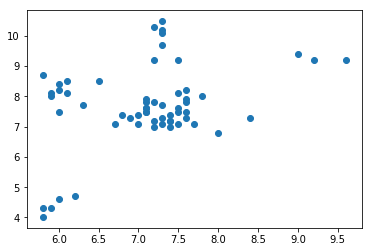

In [11]:
plt.scatter(fruit['width'],fruit['height'])

Plotting - mass v/s color_score to visualize the scatter

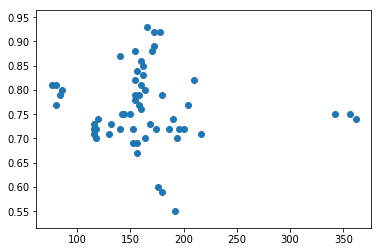

In [13]:
plt.scatter(fruit['mass'],fruit['color_score'])

### Building the Classifier using kNN on mass, width and height as color_score is not showing significant scatter

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X_features = fruit[['mass','width','height']] # Gathering features
Y_target = fruit['fruit_label'] # Capturing labes


Splitting the data into test and train groups

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_features,Y_target,random_state=0)

In [18]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [19]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


### Implementing the kNN clssifier

In [20]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Checking accuracy of the curated classifier

In [21]:
knn.score(X_test,y_test)

0.5333333333333333

Prediction - passing on the mass, width and height and then based on the classification extracting name of the fruit from the DICT crafted as predict

In [23]:
pred=knn.predict([['100','6.3','8']]) # Furnishing the mass, width and height
predict[pred[0]] # Getting name from the dictionary created earlier

'lemon'

In [26]:
pred1=knn.predict([['300','7','10']])
predict[pred1[0]]

'orange'

In [28]:
pred2=knn.predict([['180','8','7']])
predict[pred2[0]]

'apple'